In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.preprocessing import image
import keras
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
df_train=pd.read_csv("./train.csv")

In [3]:
df_train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [4]:
df_test=pd.read_csv("./test.csv")

In [5]:
df_test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [491]:
image_data={}
for path in os.listdir('train/'):
    img=os.path.join("train/",path)
    img=image.load_img(img,target_size=(100,100))
    img_arr=image.img_to_array(img)/255.0
    image_data[path]=img_arr

In [492]:
image_data_test=[]
labels_test=[]
for path in os.listdir('test/'):
    img=os.path.join("test/",path)
    img=image.load_img(img,target_size=(100,100))
    img_arr=image.img_to_array(img)/255.0
    image_data_test.append(img_arr)
    labels_test.append(path)

In [493]:
data_test_dict={}
for i in range(len(labels_test)):
    data_test_dict[labels_test[i]]=image_data_test[i]

In [494]:
df_test_id=df_test['Image']

In [495]:
X_test=[]
for i in range(df_test_id.shape[0]):
    X_test.append(data_test_dict[df_test_id[i]])
X_test=np.array(X_test)

In [496]:
df_image_id=df_train['Image']
Y_train=df_train['target']

In [497]:
X_train=[]
for i in range(df_image_id.shape[0]):
    X_train.append(image_data[df_image_id[i]])
X_train=np.array(X_train)
print(X_train.shape)

(364, 100, 100, 3)


In [498]:
le=LabelEncoder()

In [499]:
Y_train=le.fit_transform(np.array(Y_train))
Y_train=np_utils.to_categorical(Y_train)

In [500]:
print(X_train.shape,Y_train.shape)
print(X_test.shape)

(364, 100, 100, 3) (364, 8)
(156, 100, 100, 3)


In [501]:
#X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2)

### My own Model

In [258]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=256,kernel_size=(5,5),activation='relu'))
cnn_model.add(Conv2D(filters=256,kernel_size=(5,5),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

# cnn_model.add(Conv2D(filters=512,kernel_size=(7,7),activation='relu'))
# cnn_model.add(Conv2D(filters=512,kernel_size=(7,7),activation='relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.4))



cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024,activation='relu'))
cnn_model.add(Dropout(0.4))

cnn_model.add(Dense(units=1024,activation='relu'))
cnn_model.add(Dropout(0.4))

cnn_model.add(Dense(units=8,activation='softmax'))

cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_516 (Conv2D)          (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_517 (Conv2D)          (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_518 (Conv2D)          (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_519 (Conv2D)          (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 53, 53, 64)       

In [259]:
adam=Adam(lr=0.0003)
cnn_model.compile(optimizer=adam,metrics=['accuracy'],loss='categorical_crossentropy')

In [90]:
hist=cnn_model.fit(X_train,
                  Y_train,
                  validation_data=(X_val,Y_val),
                  shuffle=True,
                  batch_size=32,
                  epochs=5,
                  verbose=1)

Train on 291 samples, validate on 73 samples
Epoch 1/5
291/291 [==============================] - 53s 182ms/step - loss: 0.2664 - accuracy: 0.9141 - val_loss: 3.1830 - val_accuracy: 0.4932
Epoch 2/5
291/291 [==============================] - 56s 192ms/step - loss: 0.1669 - accuracy: 0.9381 - val_loss: 3.3549 - val_accuracy: 0.5205
Epoch 3/5
291/291 [==============================] - 56s 191ms/step - loss: 0.1438 - accuracy: 0.9519 - val_loss: 3.6755 - val_accuracy: 0.5205
Epoch 4/5
291/291 [==============================] - 56s 191ms/step - loss: 0.1380 - accuracy: 0.9691 - val_loss: 4.0215 - val_accuracy: 0.5205
Epoch 5/5
291/291 [==============================] - 56s 192ms/step - loss: 0.2413 - accuracy: 0.9381 - val_loss: 3.2853 - val_accuracy: 0.4932


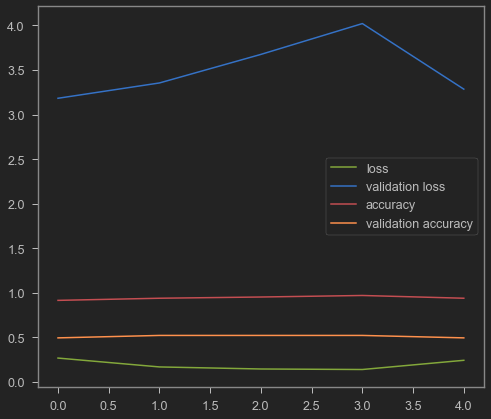

In [92]:
plt.plot(hist.history['loss'],'g',label='loss')
plt.plot(hist.history['val_loss'],'b',label='validation loss')

plt.plot(hist.history['accuracy'],'r',label='accuracy')
plt.plot(hist.history['val_accuracy'],'y',label='validation accuracy')
plt.legend()

In [93]:
predict=cnn_model.predict_classes(X_test)

In [94]:
predict=le.inverse_transform(predict)

In [95]:
worst_model=pd.DataFrame({'Image':df_test_id,'target':predict})
worst_model.to_csv("worst_model.csv",index=False)

### transfer Learning

In [6]:
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

In [28]:
model=InceptionV3(include_top=False,input_shape=(100,100,3))

In [29]:
av1=GlobalAveragePooling2D()(model.output)
d1=Dropout(0.5)(av1)
fc1=Dense(128,activation='relu')(d1)
d2=Dropout(0.5)(fc1)
fc2=Dense(8,activation='softmax')(d2)
new_model=Model(input=model.input,outputs=fc2)
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 49, 49, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 49, 49, 32)   0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

C:\Users\scsur\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [30]:
adam=Adam(lr=0.03)
new_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [31]:
for ix in range(len(new_model.layers)):
    print(ix,new_model.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x0000025A0009BE88>
1 <keras.layers.convolutional.Conv2D object at 0x0000025A00969CC8>
2 <keras.layers.normalization.BatchNormalization object at 0x0000025A00969D08>
3 <keras.layers.core.Activation object at 0x0000025A00969E48>
4 <keras.layers.convolutional.Conv2D object at 0x0000025A00972A88>
5 <keras.layers.normalization.BatchNormalization object at 0x0000025A00987CC8>
6 <keras.layers.core.Activation object at 0x0000025A00999F48>
7 <keras.layers.convolutional.Conv2D object at 0x0000025A0099AD88>
8 <keras.layers.normalization.BatchNormalization object at 0x0000025A009B3D88>
9 <keras.layers.core.Activation object at 0x0000025A009C5EC8>
10 <keras.layers.pooling.MaxPooling2D object at 0x0000025A009C8D48>
11 <keras.layers.convolutional.Conv2D object at 0x0000025A009DF1C8>
12 <keras.layers.normalization.BatchNormalization object at 0x0000025A009F59C8>
13 <keras.layers.core.Activation object at 0x0000025A009F5AC8>
14 <keras.layers.convolution

In [32]:
for i in range(310):#new_model.layers:
        new_model.layers[i].trainable = False
    
new_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 49, 49, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 49, 49, 32)   0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   validation_split=0.25,
                                   
                                   
)

In [34]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [35]:
training_set = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                directory="./train",
                                                x_col="Image",
                                                y_col="target",
                                                target_size=(100,100),
                                                batch_size=32,
                                                seed=42,
                                                shuffle=True,
                                                class_mode='categorical')

Found 364 validated image filenames belonging to 8 classes.


In [36]:
validation_set = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                directory="./train",
                                                x_col="Image",
                                                y_col="target",
                                                target_size=(100,100),
                                                batch_size=32,
                                                seed=42,
                                                shuffle=True,
                                                class_mode='categorical')

Found 364 validated image filenames belonging to 8 classes.


In [37]:
testing_set = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                directory="./test/",
                                                x_col="Image",
                                                y_col=None,
                                                seed=42,
                                                target_size=(100,100),
                                                batch_size=32,
                                                shuffle=False,
                                                class_mode=None)

Found 156 validated image filenames.


In [38]:
hist=new_model.fit_generator(training_set,
                            steps_per_epoch=64,
                            epochs=10,
                            validation_data=validation_set,
                            validation_steps=64,
                            )

Epoch 1/10
64/64 [==============================] - 59s 927ms/step - loss: 2.8493 - accuracy: 0.1211 - val_loss: 2.0885 - val_accuracy: 0.1360
Epoch 2/10
64/64 [==============================] - 57s 885ms/step - loss: 2.0961 - accuracy: 0.1380 - val_loss: 2.0448 - val_accuracy: 0.1366
Epoch 3/10
64/64 [==============================] - 58s 902ms/step - loss: 2.0780 - accuracy: 0.1324 - val_loss: 2.1207 - val_accuracy: 0.1364
Epoch 4/10
64/64 [==============================] - 58s 906ms/step - loss: 2.0780 - accuracy: 0.1273 - val_loss: 2.0937 - val_accuracy: 0.1376
Epoch 5/10
64/64 [==============================] - 60s 934ms/step - loss: 2.0782 - accuracy: 0.1299 - val_loss: 2.1009 - val_accuracy: 0.1350
Epoch 6/10
64/64 [==============================] - 59s 918ms/step - loss: 2.1065 - accuracy: 0.1255 - val_loss: 2.0427 - val_accuracy: 0.1297
Epoch 7/10
64/64 [==============================] - 58s 901ms/step - loss: 2.0831 - accuracy: 0.1304 - val_loss: 2.0755 - val_accuracy: 0.1366

In [473]:
training_set.n

364

In [518]:
training_set.class_indices

{'bharatanatyam': 0,
 'kathak': 1,
 'kathakali': 2,
 'kuchipudi': 3,
 'manipuri': 4,
 'mohiniyattam': 5,
 'odissi': 6,
 'sattriya': 7}

In [557]:
testing_set.reset()
predict=new_model.predict_generator(testing_set,
verbose=1)

5/5 [==============================] - 5s 1s/step


In [517]:
# hist=new_model.fit(X_train,
#                   Y_train,
#                   batch_size=16,
#                   epochs=10,
#                   validation_data=(X_val,Y_val),
#                   shuffle=True)

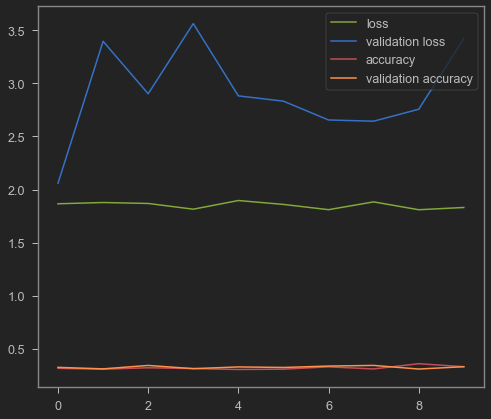

In [558]:
plt.plot(hist.history['loss'],'g',label='loss')
plt.plot(hist.history['val_loss'],'b',label='validation loss')

plt.plot(hist.history['accuracy'],'r',label='accuracy')
plt.plot(hist.history['val_accuracy'],'y',label='validation accuracy')
plt.legend()

In [385]:
# predict=new_model.predict(X_test)

In [559]:
len(predict)

156

In [ ]:
predict[:10]

In [560]:
predict=np.argmax(predict,axis=1)

In [561]:
 predict=le.inverse_transform(predict)

In [562]:
predict[:10]

array(['mohiniyattam', 'mohiniyattam', 'mohiniyattam', 'kathak',
       'bharatanatyam', 'kathakali', 'kathak', 'kathakali',
       'mohiniyattam', 'mohiniyattam'], dtype=object)

In [563]:
inception_model=pd.DataFrame({'Image':df_test_id,'target':predict})
inception_model.to_csv("inception_model.csv",index=False)